# Classification in Practice

In this laboratory session we will gain some experience working with linear models for **classification** (we already saw how to do regression in a previous lab).

We will follow the same general structure... with one exception -- for this laboratory we will begin with **synthetic** datasets. 

## Part 1: Working with Synthetic Classification Problems

Generating synthetic datasets allows us to gain insight into how classifiers work. We will use some functionality of Scikit-learn to generate -- in a controlled manner -- synthetic classification problems of with various characteristics.

**Note**: When working with these synthetic datasets we will *not* go to the trouble of generating train/test splits -- we are only interested in studying how classifiers work to **separate** the training data.

### Exercise 1.1: Generating a dataset

First, have a look at the documentation for [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs). This is one of the easiest ways to generate /simple/ classification problems. Study the documentation and then use `make_blobs` to generate an **EASY** dataset for a **two-class** classification problem with 100 samples per class and 2 input features. What does **EASY** mean? How can we determine, qualitatively, that the randomly generated dataset is "easy"? Make the problem *easy*, but not *too easy*.

**Hint**: You will probably want to develop a *visualization* for datasets, and then *abstract* it into a function you can call later for other datasets. 

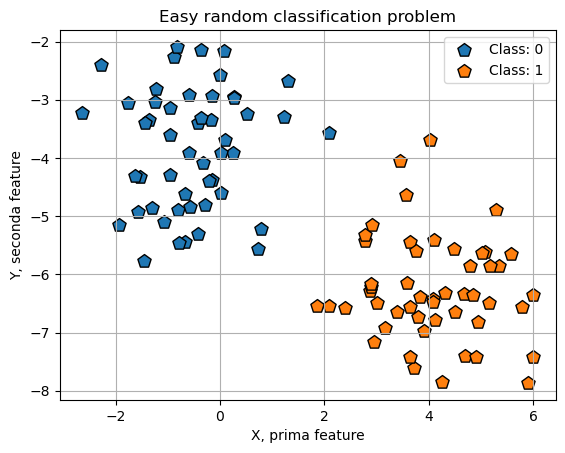

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Generazione del dataset
np.random.seed(1252) # permette di ottenere un comportamente casuale riproduvibile.
(Xs,ys) = make_blobs(centers=2) # Col parametro `random_state` avevamo un comportamento casualmente riproducibile solo in questa chiamata e non in tutto il notebook.

#Visualizzare il dataset
def visualize_dataset(Xs, ys, title=''):
    for label in np.unique(ys):
        plt.scatter(Xs[ys==label, 0], Xs[ys==label, 1], label=f'Class: {label}', marker='p', s=100, edgecolor='black')
    plt.xlabel("X, prima feature")
    plt.ylabel("Y, seconda feature")
    plt.title(title)
    plt.grid()
    plt.legend()

visualize_dataset(Xs, ys, 'Easy random classification problem')


**Analisi**

In questo contesto semplice vuol dire linearmente separabile. Questo si può verificare graficamente: non ci devono essere sovrapposizioni delle due classi.

### Exercise 1.2: "Solving" the dataset

Train a classifier that is *perfectly* classifies the dataset you created above. Any of the the three classifiers mentioned in the *Capsule Lecture* should do well. Try one, or try all three. Be sure to verify that the classifier does *indeed* classify all training points correctly.

**Hint**: You might want to look at [sklearn.metrics.classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) for this.

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report

def simple_pipeline(cls, Xs, ys):
    cls.fit(Xs, ys)
    preds = cls.predict(Xs)
    #preds = cls.predict_proba(Xs) -> restituisce la priorità di appartenenza alla classe
    print(f'Model: {cls.__class__.__name__}')
    print(classification_report(ys, preds, digits=3))
    print('\n')

for cls in [LinearDiscriminantAnalysis(),
            QuadraticDiscriminantAnalysis(),
            LinearSVC(dual=True, max_iter=100000),
            LinearSVC(C=2, dual=True, max_iter=100000)]:
    simple_pipeline(cls, Xs, ys)

Model: LinearDiscriminantAnalysis
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      1.000     1.000     1.000        50

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100



Model: QuadraticDiscriminantAnalysis
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        50
           1      1.000     1.000     1.000        50

    accuracy                          1.000       100
   macro avg      1.000     1.000     1.000       100
weighted avg      1.000     1.000     1.000       100



Model: LinearSVC
              precision    recall  f1-score   support

           0      1.000     0.980     0.990        50
           1      0.980     1.000     0.990        50

    accuracy                          0.990       100
   macro avg      0.990     0.990   

**Analisi**

- Medie
    - `macro avg`: calcola la media aritmedica delle metriche senza considerare la distribuzione della classi all'interno del dataset. In questo modo ogni classe ha lo stesso peso a prescindere dal numero di sample. È utile per capire le performance del modello su tutte le classi.
    - `weighted avg`: calcola la media aritmedica delle metriche ponderata secondo il numero di sample di ogni classe. In questo modo le classi con più sample hanno più impatto. È utile quando abbiamo problemi di classificazione non bilanciati.
- LinearDiscriminantAnalysis / QuadraticDiscriminantAnalysis
    - Vediamo che l'accuratezza e le altre metriche sono massime e il modello separa perfettamente il dataset. Ricordiamo che questo non ci dice nulla sul come esso funzionerebbe su dati non visti.
- LinearSVM
    - Osserviamo che con senza cambiamenti all'iperparametro $C$ (default=1) il classificatore non separa perfettamente il dataset. Questo èuò essere dovuto a più aspetti (anche se questo non è forse il caso): punti che si sovrappongono (che graficamente non si vedono) e quindi che non sono linearmente separabili; di deafult utilizza la squared hinge loss function, che tende a penalizzare maggiormente gli outliers, cioè campioni più lontani dal margione.
    - In questa situazione avendo un dataset che sappiamo essere lineamente separabile possiamo impostare un valore di C alto in modo da rendere `LinearSVM` un classificato hard margin. Vediamo infatti che già per $C=2$ il classificaitore si comporta bene.

### Exercise 1.3: Visualizing the decision surfaces

One of the best ways to understand how a classifier works is to visualize the decision boundaries. Use [sklearn.inspection.DecisionBoundaryDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.DecisionBoundaryDisplay.html) to create a visualization of the *dataset* and the *decision boundaries* for your classifier.

**Note**: This is another great opportunity to apply *functional abstraction* and make a **reusable** visualization that you can reuse (for example in the next exercise).

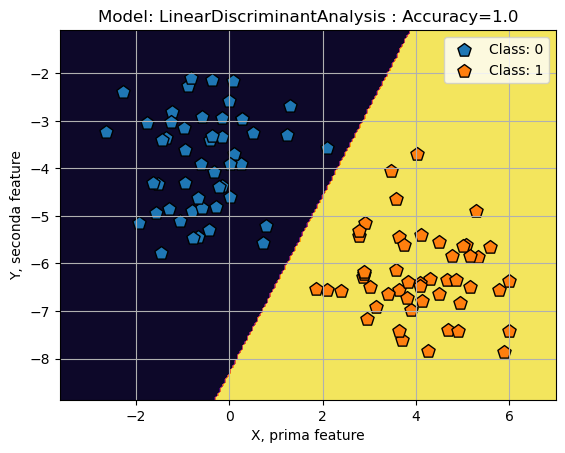

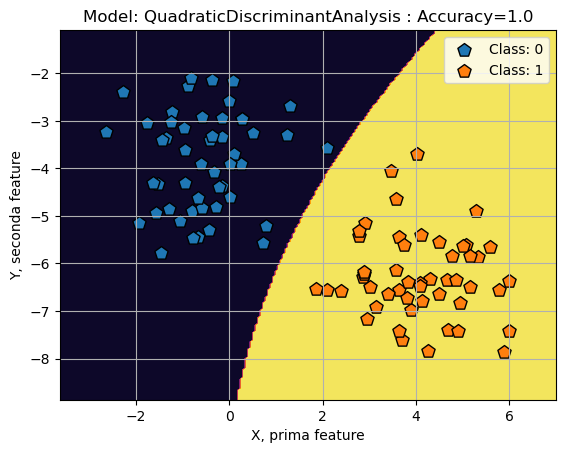

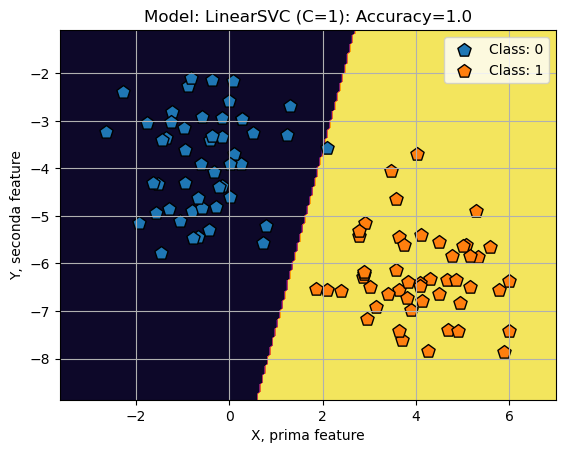

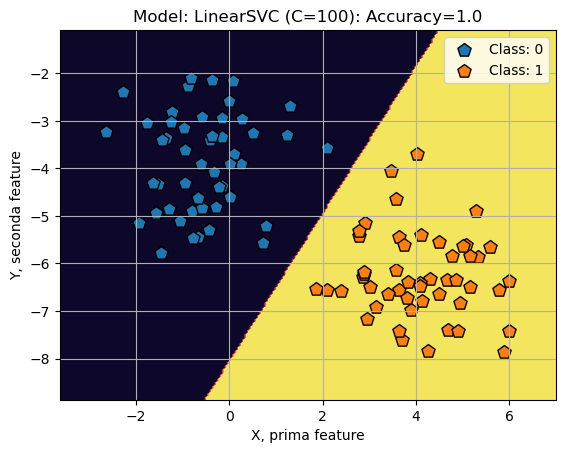

In [3]:
from sklearn.inspection import DecisionBoundaryDisplay

def visualize_classifier(cls, Xs, ys, info_title=''):
    cls.fit(Xs, ys)
    DecisionBoundaryDisplay.from_estimator(cls, Xs, cmap='inferno', response_method='predict', grid_resolution=200)
    visualize_dataset(Xs, ys)
    plt.title(f'Model: {cls.__class__.__name__} {info_title}: Accuracy={cls.score(Xs, ys)}')

for cls in [LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis()]:
    visualize_classifier(cls, Xs, ys)
for C in [1,100]:
    visualize_classifier(LinearSVC(C=C, dual=True, max_iter=100000), Xs, ys)
    plt.title(f'Model: {LinearSVC().__class__.__name__} (C={C}): Accuracy={cls.score(Xs, ys)}')

**Analisi**

- Per quanto riguarda il bordo di `LinearDiscriminantAnalysis`e di `QuadraticDiscriminantAnalysis` c'è poco da dire: il primo è chiaramente un bordo lineare e il secondo non lineare. Entrambi come osservato al punto precedente dell'esercizio separano perfettamente il dataset.
- Per `LinearSVM` osserviamo quando descritto precedentemente: per $C=1$ il classificatore non separa perfettamente il dataset; per $C\ge2$ (in questo caso abbiamo usato 100 per visualizzare meglio il comportamento hard margin) questo problema è risolto.

### Exercise 1.4: A harder dataset

Repeat the exercises above, but first generate a **hard** dataset that is not linearly separable. Observe how linear classifiers fail to correctly classify the training data.

How can we make these classifiers capable of "solving" this harder dataset? Try to find an explicit embedding that makes the problem linearly separable in the embedding space.

Visualize the decision boundaries in the **original** space (you will need to spend some time with the documentation for `DecisionBoundaryDisplay` to make this work).

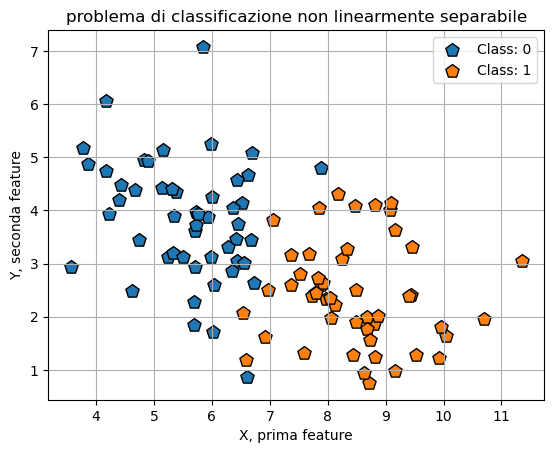

In [4]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

#Generare un dataset da un seed.
np.random.seed(12243) #campio del seed per cambiare dataset
(Xs, ys) = make_blobs(centers=2)

visualize_dataset(Xs, ys, 'problema di classificazione non linearmente separabile')

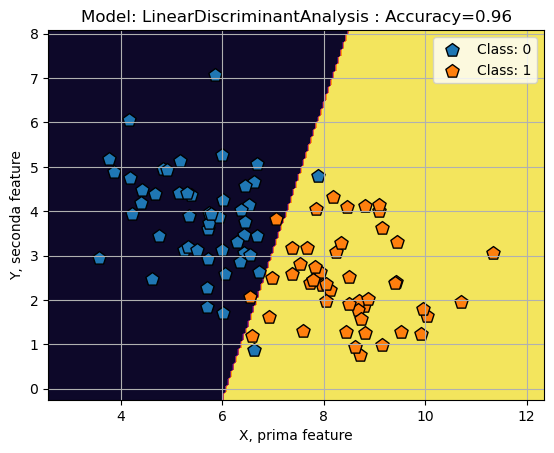

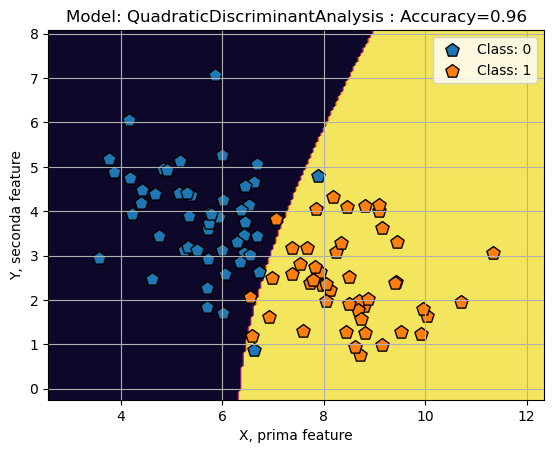

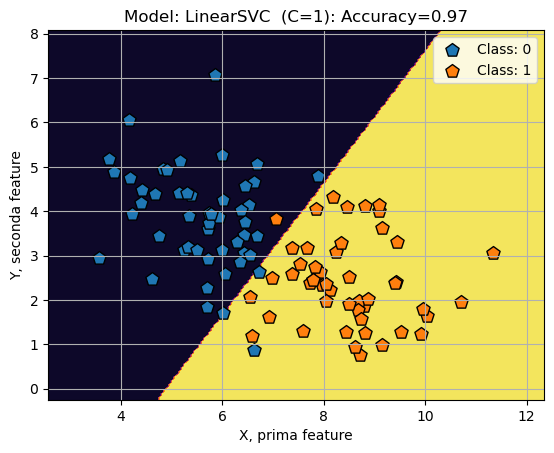

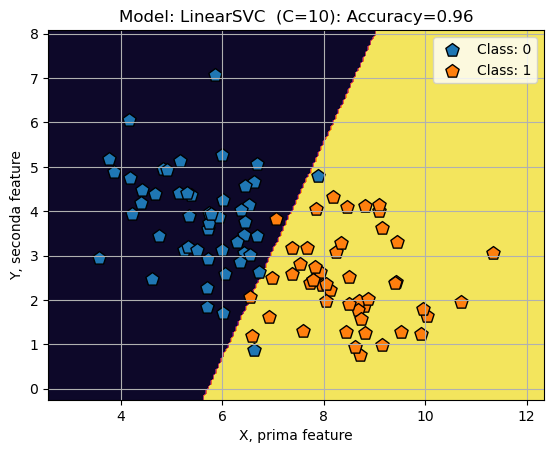

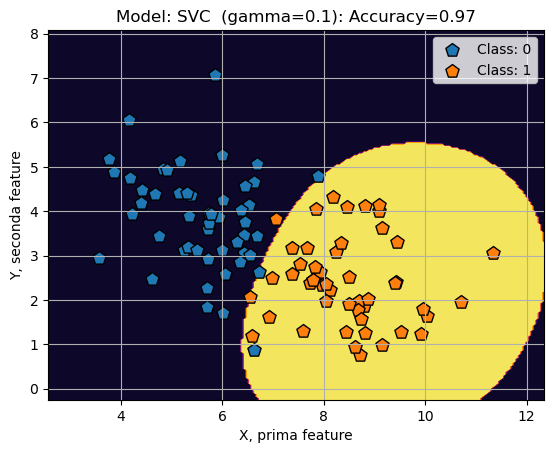

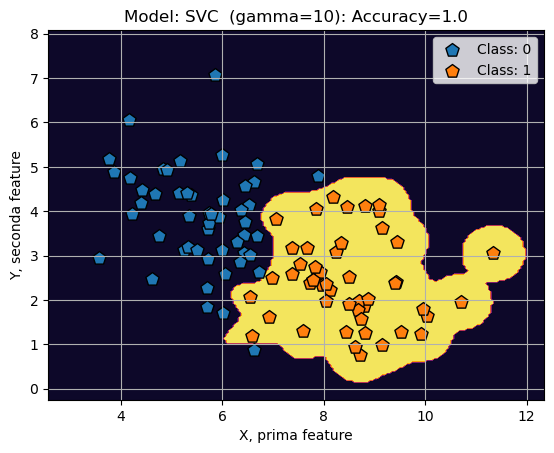

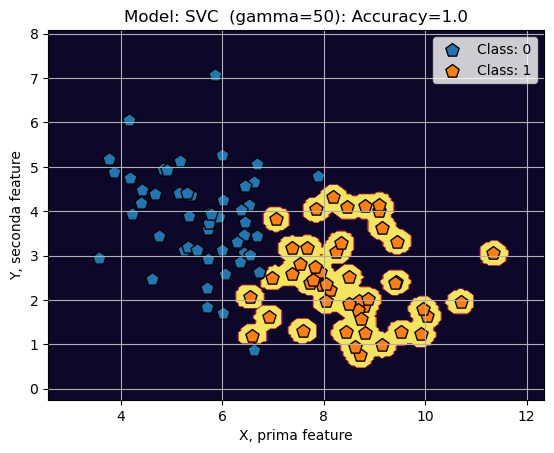

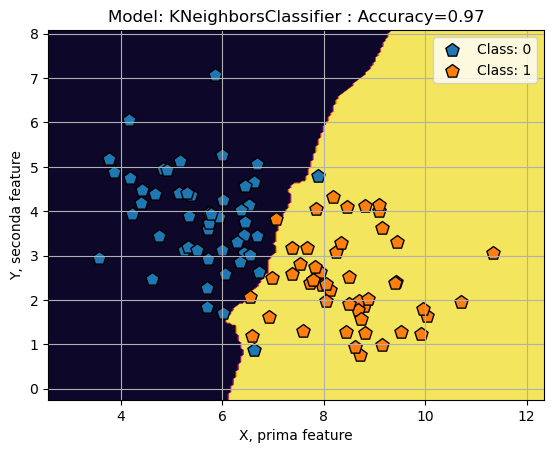

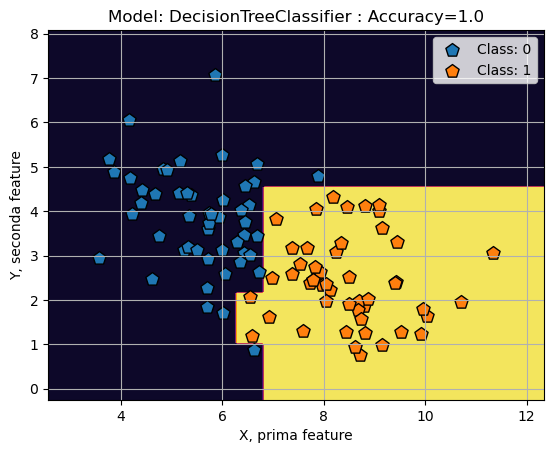

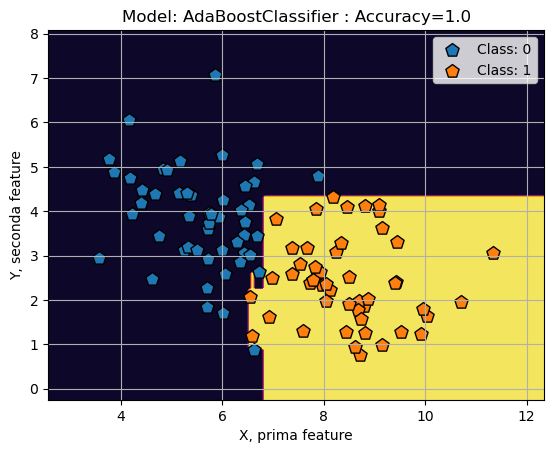

In [5]:
cls = [LinearDiscriminantAnalysis(),
       QuadraticDiscriminantAnalysis()]
for cls in cls:
    visualize_classifier(cls, Xs, ys)

for C in [1,10]:
    visualize_classifier(LinearSVC(C=C, dual=True, max_iter=100000), Xs, ys, info_title=f' (C={C})')

for gamma in [0.1, 10, 50]:
    cls = SVC(gamma=gamma, C=10, max_iter=100000)
    visualize_classifier(cls, Xs, ys, info_title=f' (gamma={gamma})')

cls = [KNeighborsClassifier(),
       DecisionTreeClassifier(),
       AdaBoostClassifier()]
for cls in cls:
    visualize_classifier(cls, Xs, ys)

**Analisi**

Come prima cosa si è visualizzato il dataset per confermare che sia più "complesso" del precedente.

- Sono state analizzati i modelli visti per il dataset linearmente transormabile. In più sono stati aggiunti tre classificatori.
- `SVC`:
    - Di default utilizza la kernel function RBF, che rende il dataset lineamente trasformabile. Il problema è che si introduce molto overfitting: su un nuovo sample che non ricade nella regione gialla (molto probabile) avremo una classificazione sbagliata (se dovesse appartenere alla classe 1).
    - Osserviamo che per valori di gamma alti si ha un confine più complesso che si adatta bene al training set, ovviamente aumentando l'overfitting; a questo proposito osserviamo anche che l'accurettezza del modello è massima. Possiamo vedere anche che (come già detto al punto sopra) o un sample nuovo cade nella regione gialla (molto difficile) oppure il campione sarà calssificato in modo sbagliato. Quando invece gamma ha un valore basso il borde tende ad essere più semplice e porta ad una regione più ampia.
- `DecisionTreeClassifier` e `AdaBoostClassifier`
    - Possiamo osservare che l'accuratezza sul dataset per questi due classificatori è massima. Il problema è l'elevato overfitting introddo. Il conetto è lo stesso di cui sopra delle `SVC`: si aumenta l'accuratezza sul training set, ma nuovi campioni che cadono fuori dalla regione di decisione (molto probabile che succeda) saranno classificati in modo sbagliato (se dovessero appartenere alle classe 1).

Osservando il bordo di decisione, e considerando che il dataset è generato da una gaussiana (docuemntazione `make_blobs`), probabilmente il miglior classificatore in questo caso è `LinearDiscriminantAnalysis`; questo infatti fa un'assunzione sulla distribuzione dei dati che compongono il dataset.

/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


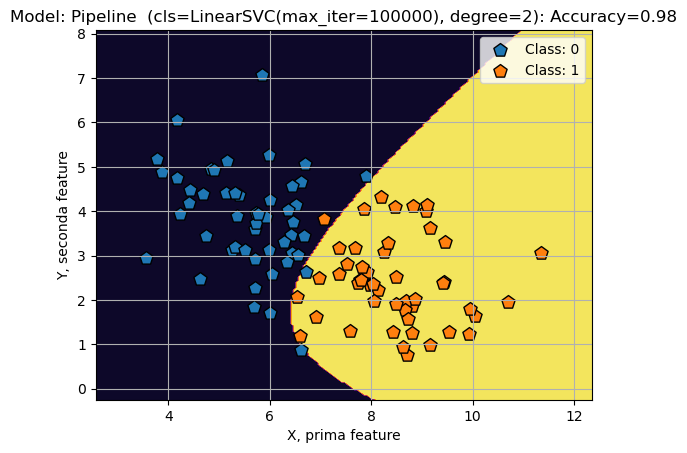

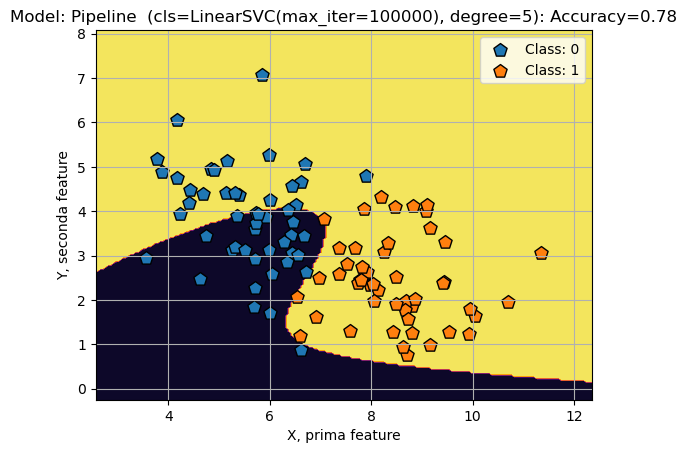

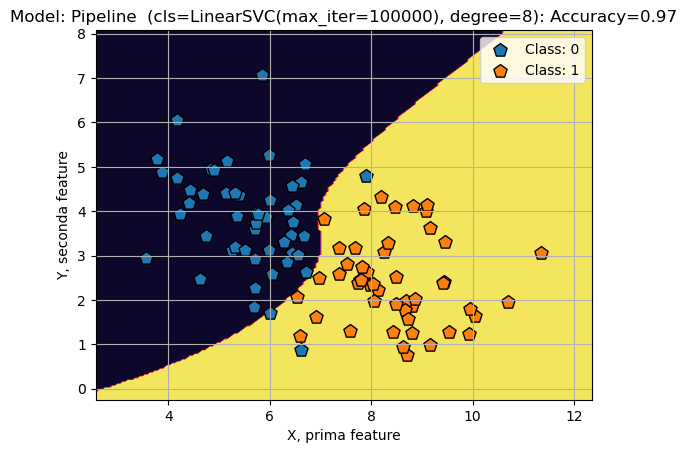

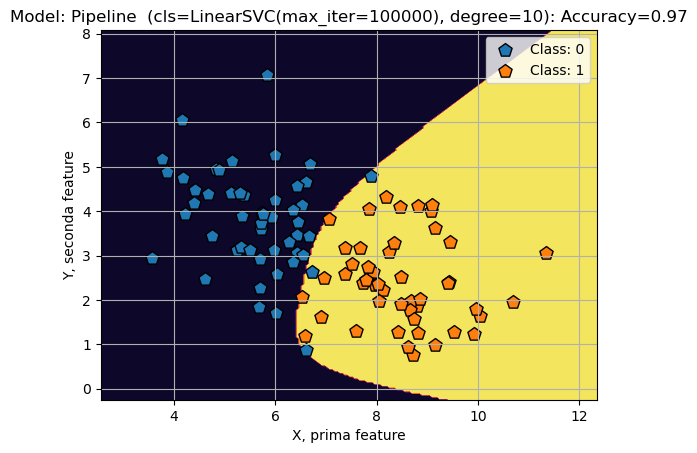

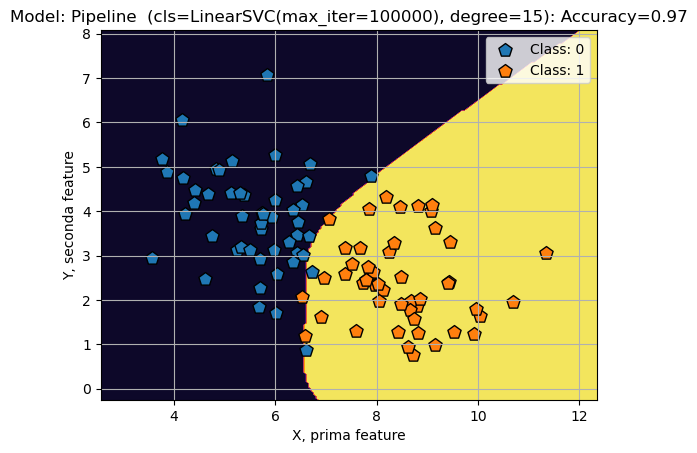

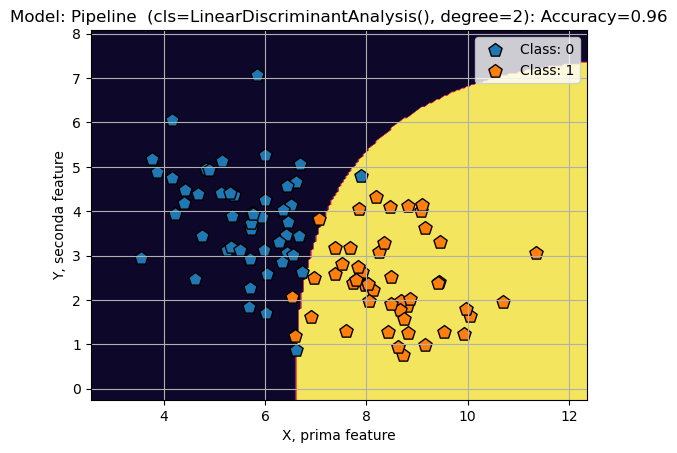

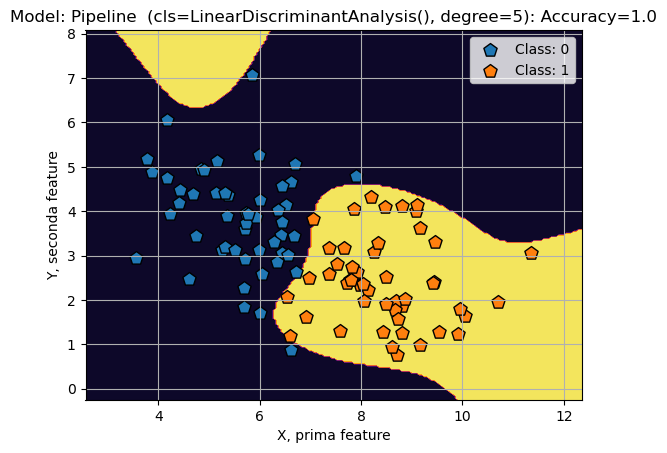

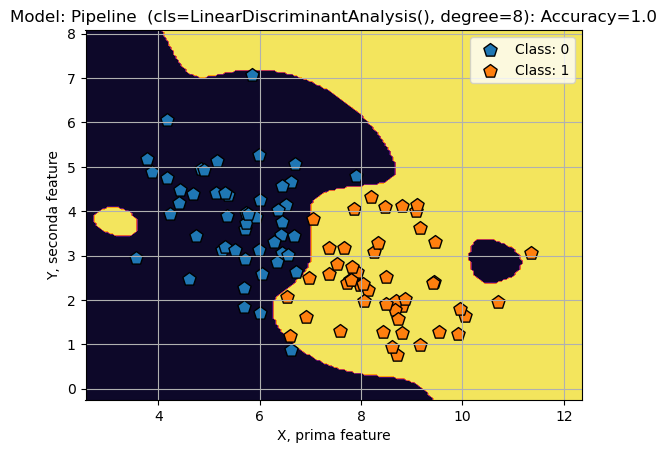

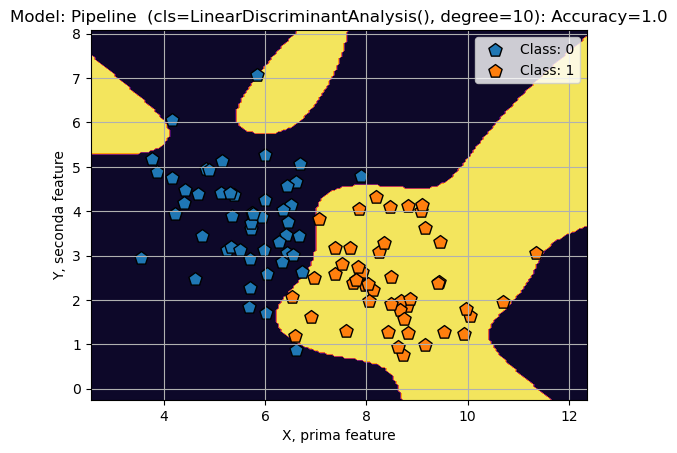

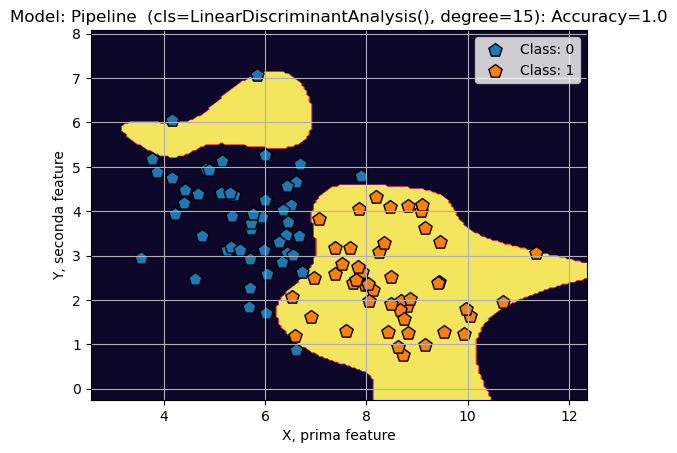

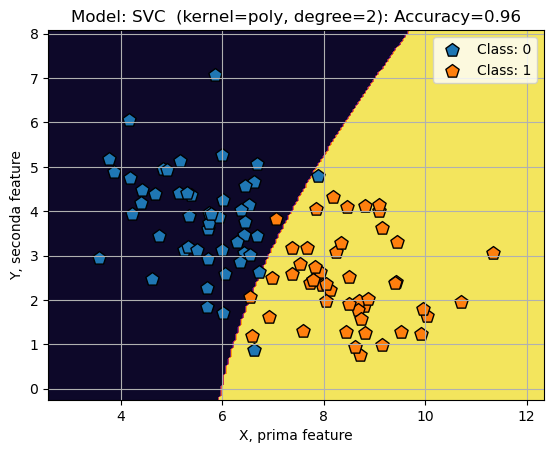

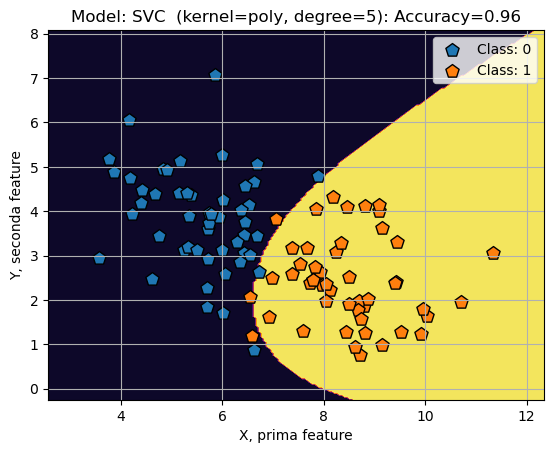

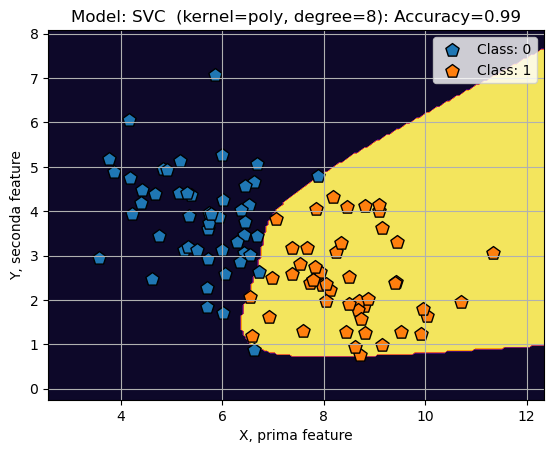

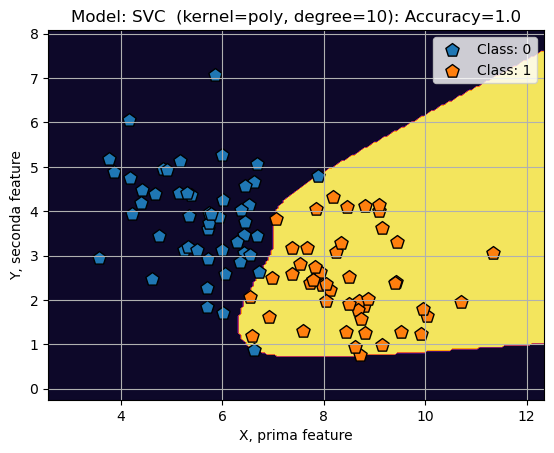

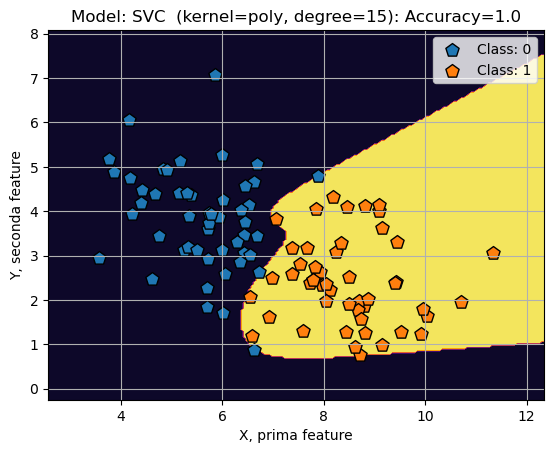

In [6]:
# explicit embedding

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# metodo con PolynomialFeatures
poly = PolynomialFeatures(degree=2)
Xs_poly = poly.fit_transform(Xs)
for cls in [
    LinearSVC(max_iter=100000),
    LinearDiscriminantAnalysis()]:
    for degree in [2, 5, 8, 10, 15]:
        pipeline = Pipeline([
            ('poly_feature', PolynomialFeatures(degree=degree, include_bias=False)),
            ('logistic', cls)])
        visualize_classifier(pipeline, Xs, ys, info_title=f' (cls={cls}, degree={degree})')

# metodo del kernel con SVC
for degree in [2, 5, 8, 10, 15]:
    cls = SVC(kernel='poly', degree=degree)
    visualize_classifier(cls, Xs, ys, info_title=f' (kernel=poly, degree={degree})')

**Analisi**

- kernel SVC.
    - Il metodo del kernel è più efficiente per dataset relativamente piccoli; è invece meno efficiente quando il dataset diventa grande, a causa del calcolo della matrice di Gram che ha dimensione $N\times N$.
    - È più semplice da graficare, perché si può utilizzare la funzione `visualize_classifier` come negli altri casi.
    - Si vede che dal grado 10 in poi il dataset è linearmente separabile. Ovviamente più si alza il grado più si aumenta l'overfitting.
    - Ovviamente è un metodo utilizzabile solo con il classificatore `SVC`.
- PolynomialFeatures
    - È un metodo più efficiente se il dataset è molto grande.
    - Si osserva che nel nostro caso il dataset non è reso linearmente separabile da `LinearSVC` (test fatti fino al grado 15 per evitare di avere troppi grafici), mentre lo è per `LinearDiscriminantAnalysis`.
    - Diventa più difficile graficare il bordo di decisione. Non ho trovato nella classe `DecisionBoundaryDisplay` un metodo per disegnare il bordo di decisione nello spazio originale; ho chiesto a chatGPT e mi ha trovato il metodo usato nel codice.
- Gli warning di non convergenza sono stati ignorati perché aumentando troppo le iterazioni il tempo di esecuzione è troppo lungo.

---
## Part 2: A Real Dataset

In the second set of exercises we will work with a classic dataset for classification: the Iris Flower Classification Dataset. It is a fairly easy dataset to work with since it is low-dimensional and small. We start by loading the dataset, and then proceed with our usual protocol: "playing" with the data, creating train/test splits, and building and evaluating a first classifier. 

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris

ds = load_iris(as_frame=True)
df = ds.frame
targets = df.target
df = df.drop(columns=['target'])

**Analisi**

Come sempre dobbiamo separe i dati dai target in modo che il modello non includa informazioni su di essi.

### Exercise 2.1: Play with the data

Use everything we have learned about *exploratory data analysis* to study the nature and characteristics of this classification problem. Are the classes equally represented? How many features are there in input? How are input features scaled? **Be creative** and **summarize** your findings with analysis along the way.

In [8]:
print(ds.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<function matplotlib.pyplot.show(close=None, block=None)>

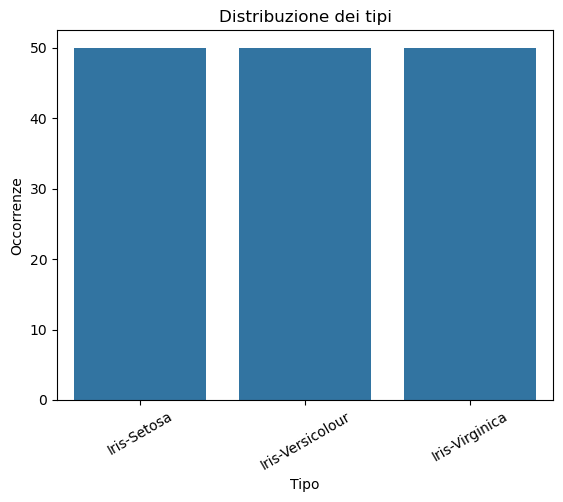

In [10]:
pd_target = pd.Series(targets)
label = {0: "Iris-Setosa", 1: "Iris-Versicolour", 2: "Iris-Virginica"}
pd_target = pd_target.replace(label)
targets_count = pd_target.value_counts()

sns.barplot(x=targets_count.index, y=targets_count.values)
plt.title("Distribuzione dei tipi")
plt.xlabel("Tipo")
plt.ylabel("Occorrenze")
plt.xticks(rotation=30)

plt.show

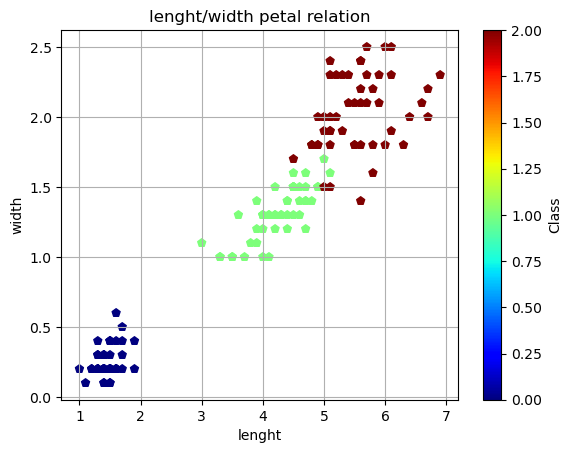

In [11]:
lenght = df['petal length (cm)']
width = df['petal width (cm)']

plt.scatter(lenght, width, c=targets, marker='p', cmap='jet')
plt.xlabel('lenght')
plt.ylabel('width')
plt.grid(True)
plt.colorbar(label='Class')
plt.title('lenght/width petal relation')

plt.show()

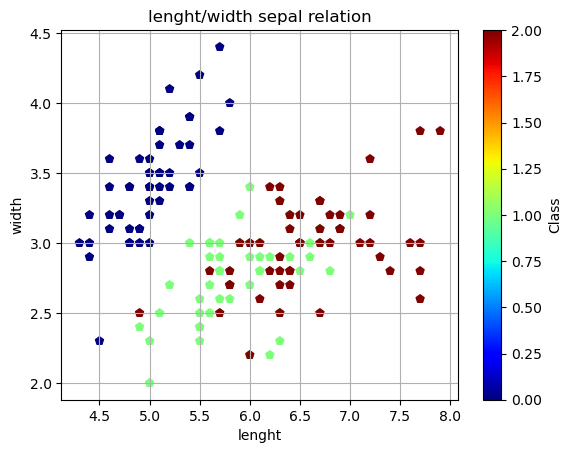

In [12]:
lenght = df['sepal length (cm)']
width = df['sepal width (cm)']

plt.scatter(lenght, width, c=targets, marker='p', cmap='jet')
plt.xlabel('lenght')
plt.ylabel('width')
plt.grid(True)
plt.colorbar(label='Class')
plt.title('lenght/width sepal relation')

plt.show()

**Aalisi**

- Osserviamo se abbiamo caricato bene il dataset confrontando la dimensione di `df` e i valori presenti nella sua descrizione.
- La descrizione ci dice che abbiamo un problema di classificazione perfettamente bilancaito. Verifichiamolo con gli istogrammi: essendo 150 i campioni dobbiamo ottenere 3 barre da 50 sample l'una. Ovviamente è così.
- È stata osservata la relazione tra la lunghezza e la larghezza dei petali (`sepal length` e `sepal width`); si può notare che date queste due caratteristiche si riesce già a farsi un'idea di come possono essere classificati i campioni. Stessa cosa è stata fatta per i sepali, ma il risultato è diverso e non concludente.

### Exercise 2.2: Your Turn

Design an experiment to decide which of the three classifiers we have seen performs best on this dataset. Some things to keep in mind:
+ You will probably want to use [sklearn.model_selection.cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to perform K-fold cross-validation to ensure you are *robustly* estimating performance.
+ All three of the classifier models we have used support **regularization**, which might be an interesting hyperparameter to cross-validate. Unfortunately they use slightly different terminologies:
  + in `sklearn.discriminant_analysis.LinearDiscriminantAnalysis` it is called `shrinkage`
  + in `sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis` it is called `reg_param`
  + and in `sklearn.svm.LinearSVC` it is called `C` -- but the regularization performed is 1/C!
  
**Important**: Remember to *document* your findings and analyses along the way. Summarize and justify your final conclusions.

In [13]:
from sklearn.model_selection import cross_val_score

def mean_cross_validate(cls, Xs, ys, cv=3):
    return cross_val_score(cls, Xs, ys, cv=cv).mean()

print('Media degli scores della cross-validation:\n')
print(f'LinearDiscriminantAnalysis: {mean_cross_validate(LinearDiscriminantAnalysis(), df, targets)}')
print(f'LinearDiscriminantAnalysis (lsqr): {mean_cross_validate(LinearDiscriminantAnalysis(shrinkage=1, solver="lsqr"), df, targets)}')
print('')
print(f'QuadraticDiscriminantAnalysis: {mean_cross_validate(QuadraticDiscriminantAnalysis(), df, targets)}')
print(f'QuadraticDiscriminantAnalysis (reg): {mean_cross_validate(QuadraticDiscriminantAnalysis(reg_param=1), df, targets)}')
print('')
for C in [0.1, 0.5, 1, 2, 10, 20]:
    print(f'LinearSVC (C={C}): {mean_cross_validate(LinearSVC(C=C, dual=True, max_iter=100000), df, targets)}')
print('')
for C in [0.1, 0.5, 1, 2, 10, 20]:
    print(f'SVC (RBF, C={C}): {mean_cross_validate(SVC(C=C, max_iter=100000), df, targets)}')

Media degli scores della cross-validation:

LinearDiscriminantAnalysis: 0.98
LinearDiscriminantAnalysis (lsqr): 0.9333333333333332

QuadraticDiscriminantAnalysis: 0.9666666666666667
QuadraticDiscriminantAnalysis (reg): 0.9266666666666667

LinearSVC (C=0.1): 0.9466666666666667
LinearSVC (C=0.5): 0.9533333333333333
LinearSVC (C=1): 0.9666666666666667
LinearSVC (C=2): 0.9666666666666667
LinearSVC (C=10): 0.96
LinearSVC (C=20): 0.9666666666666667

SVC (RBF, C=0.1): 0.9
SVC (RBF, C=0.5): 0.9666666666666667
SVC (RBF, C=1): 0.96
SVC (RBF, C=2): 0.9666666666666667
SVC (RBF, C=10): 0.9733333333333333
SVC (RBF, C=20): 0.98


**Analisi**

Non ho usato un ciclo `for` perché volevo scrivere una descrizione specializzata per ogni classificatore (non solo il nome della class). Non ho analizzato tutti i modelli perché è quello che faremo nel prossimo esercizio usando la grid search.

- `LinearDiscriminantAnalysis` e `QuadraticDiscriminantAnalysis`
    - La versione con il regolarizzatore funziona peggio. Questo probabilmente è perché iris è un dataset bene bilanciato e applicare il regolarizzatore abbasserebbe la relazione tra le feature. Si è usato $shrinkage=1$ per mostrare moggiormanete la differenza tra la versione regolarizzata e non.
- `LinearSVC`
    - Si può esservare che per un $C$ maggiore il modello funziona meglio. QUesto comportamento può essere ricondotto all'osservazione precedente fatta per `LinearDiscriminantAnalysis` e `QuadraticDiscriminantAnalysis`: aumentando l'iperparametro si riduce il controduto di quello che può essere considerato un regolarizzatore.
- `SVC`
    - Esattamente stesso ragionamento osservato per `LinearSVC`.

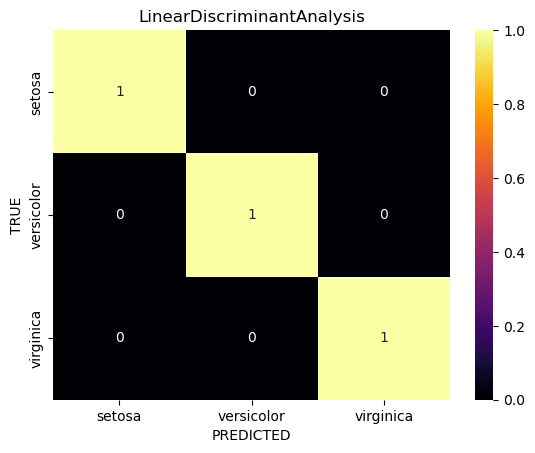

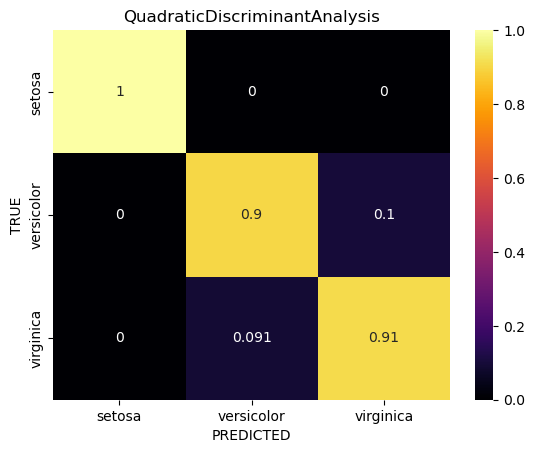

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

(X_train, X_test, y_train, y_test) = train_test_split(df, targets, train_size=0.75)
linear = LinearDiscriminantAnalysis()
quadratic = QuadraticDiscriminantAnalysis(reg_param=1)
def my_confusion_matrix(matrix, title=''):
    sns.heatmap(matrix, annot=True, cmap="inferno", xticklabels=ds.target_names, yticklabels=ds.target_names)
    plt.xlabel('PREDICTED')
    plt.ylabel('TRUE')
    plt.title(title)
    plt.show()

# linear confusion matrix
linear.fit(X_train, y_train)
preds = linear.predict(X_test)
cm_linear = confusion_matrix(y_test, preds, normalize='true')

# quadratic confusion matrix
quadratic.fit(X_train, y_train)
preds = quadratic.predict(X_test)
cm_quadratic = confusion_matrix(y_test, preds, normalize='true')

# visualizzazione
my_confusion_matrix(cm_linear, title='LinearDiscriminantAnalysis')
my_confusion_matrix(cm_quadratic, title='QuadraticDiscriminantAnalysis')

**Analisi**

Per vedere come nella pratica avere degli score più alti sia effettivamente un'aspetto positivo, ho preso i due modelli che hanno restituito lo score migliore (`LinearDiscriminantAnalysis`) e peggiore (`QuadraticDiscriminantAnalysis`) e ho fatto una classificazione sullo stesso dataset. Per fare una valutazione sulle predizioni ho usato poi una matrice di confusione.

Osserviamo che il dataset su cui si valutano i due classificatori è lo stesso: quello che volevamo mostrare è infatti come `QuadraticDiscriminantAnalysis` si comporta peggio di `LinearDiscriminantAnalysis`; per farlo il dataset deve essere lo stesso.

---
## Part 3: A Harder Dataset

OK, now let's switch to the **digits** dataset which should be a bit more challenging. This should be easy by now, and if you have been careful about **functional abstraction** you should be able to reuse much of the functionality from above.

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_digits

ds_digits = load_digits()

df_digits = pd.DataFrame(ds_digits.data)
targets_digits = pd.Series(ds_digits.target)
Xs = ds_digits.data
ys = ds_digits.target

### Exercise 3.1: Exploratory data analysis

You know the drill, see what this dataset is made of.

In [16]:
print(ds_digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

<function matplotlib.pyplot.show(close=None, block=None)>

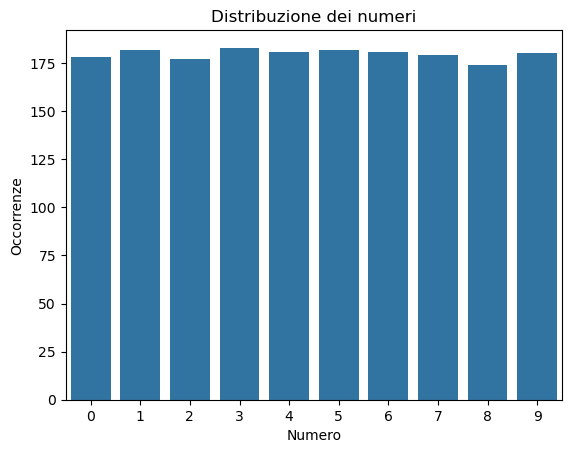

In [17]:
targets_count = targets_digits.value_counts()

sns.barplot(x=targets_count.index, y=targets_count.values)
plt.title("Distribuzione dei numeri")
plt.xlabel("Numero")
plt.ylabel("Occorrenze")

plt.show

**Analisi**

- Il dataset è composto da istanze ognuna descritta da 64 attributi. Gli attributi in questo caso sono i pixel che compongono l'immagine (cioè l'istanza, la riga). I targets sono il numero che la sequenza di pixel sta rappresentando.
- Dall'istogramma vediamo che i sample nel dataset sono ben distruibuti. Anche in questo caso siamo di fronte ad un problema bilanciato.

### Exercise 3.2: Visualize Some Images

Now we are working with (very small) images. There a useful Matplotlib function for visualizing images is `imshow()`. Use it like this:

 `plt.imshow(df_digits.iloc[0,:].to_numpy().reshape(8,8), cmap='gray')`

 **NOTE**: The Pandas DataFrame structure is kind of getting in our way here -- we have to extract a row, then **convert** it to a numpy array, and then **resize** it to (8,8) to view it.

View some images from the dataset.

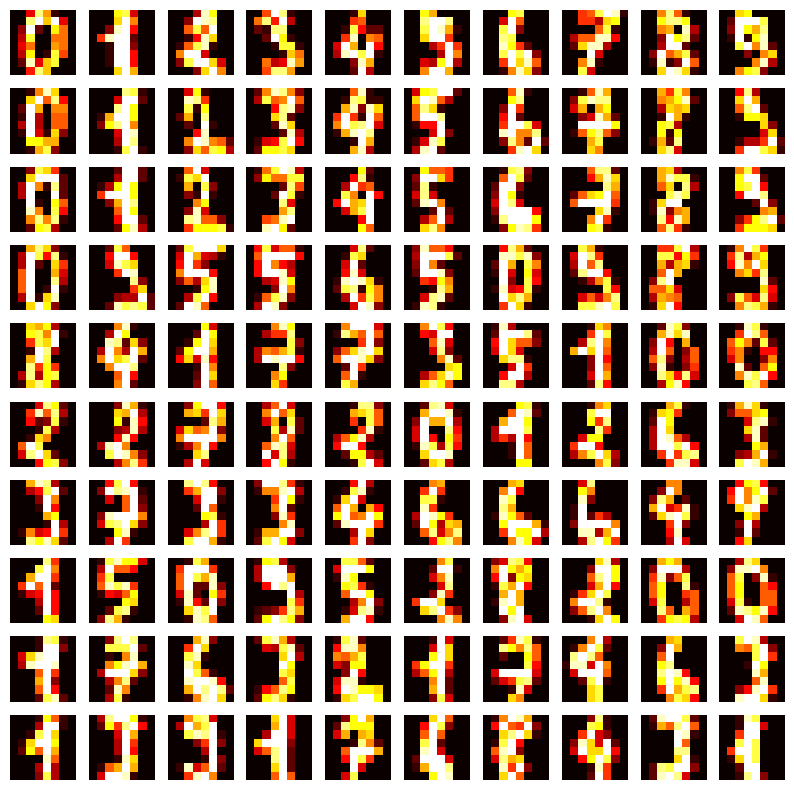

In [18]:
plt.figure(figsize=(10,10))
for row in range(100):
    plt.subplot(10, 10, row+1)
    plt.imshow(Xs[row].reshape(8,8), cmap='hot')
    plt.axis('off')

### Exercise 3.3: Find the best classifier (of the ones we have seen)

You should now be very familiar with this game and if you consolidated the pieces you used before, this exercise should be easy. As always, document, summarize, and justify your conclusions and analyses.

In [19]:
from sklearn.model_selection import GridSearchCV

(X_train, X_test, y_train, y_test) = train_test_split(Xs, ys, train_size=0.75)

#Grid search sull'iperparametro reg_param di QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
hyperparameter = {'reg_param': [0.1, 0.25, 0.5, 0.75, 1]}
search = GridSearchCV(model, hyperparameter, cv=3, n_jobs=4)
search.fit(X_train, y_train)
cls_QDA = search.best_estimator_
best_QDA = search.best_score_
best_reg_QDA = search.best_params_['reg_param']

#Grid search sull'iperparametro C e per la loss di LinearSVC
model = LinearSVC(dual=True, max_iter=100000)
hyperparameter = {'C': [0.01, 0.1, 1, 10, 100],
                  'loss': ['hinge', 'squared_hinge']}
search = GridSearchCV(model, hyperparameter, cv=3, n_jobs=4)
search.fit(X_train, y_train)
cls_LinearSVC = search.best_estimator_
best_LinearSVC = search.best_score_
best_C_LinearSVC = search.best_params_['C']
best_loss_LinearSVC = search.best_params_['loss']

#Grid search sull'iperparametro C, il kernel e il grado di SVC
model = SVC()
hyperparameter = {'C': [0.01, 0.1, 1, 10, 100],
                 'kernel': ['rbf', 'poly'],
                 'degree': [2, 5, 10]}
search = GridSearchCV(model, hyperparameter, cv=3, n_jobs=4)
search.fit(X_train, y_train)
cls_SVC = search.best_estimator_
best_SVC = search.best_score_
best_C_SVC = search.best_params_['C']
best_kernel_SVC = search.best_params_['kernel']

#Grid search su n_neighbors di KNeighborsClassifier
model = KNeighborsClassifier()
hyperparameter = {'n_neighbors': [3, 5, 10, 20]}
search = GridSearchCV(model, hyperparameter, cv=3, n_jobs=4)
search.fit(X_train, y_train)
cls_KNN = search.best_estimator_
best_KNN = search.best_score_
best_n_KNN = search.best_params_['n_neighbors']

#Grid search su n_estimators di AdaBoostClassifier
model = AdaBoostClassifier()
hyperparameter = {'n_estimators': [10, 50, 100],
                 'learning_rate': [1, 5, 10, 50, 100]}
search = GridSearchCV(model, hyperparameter, cv=3, n_jobs=4)
search.fit(X_train, y_train)
cls_Ada = search.best_estimator_
best_ada = search.best_score_
best_n_ada = search.best_params_['n_estimators']
best_rate_ada = search.best_params_['learning_rate']

#Score
print(f'LDC: {mean_cross_validate(LinearDiscriminantAnalysis(), Xs, ys)}')
print(f'QDF: {mean_cross_validate(QuadraticDiscriminantAnalysis(), Xs, ys)}')
print(f'QDF (invertibile): {best_QDA}, con reg_param={best_reg_QDA}')
print(f'LinearSVC: {best_LinearSVC}, con C={best_C_LinearSVC} e loss={best_loss_LinearSVC}')
print(f'SVC: {best_SVC}, con C={best_C_SVC} e kernel={best_kernel_SVC}')
print(f'KNN: {best_KNN}, con n_neighbors={best_n_KNN}')
print(f'Ada: {best_ada}, con n_estimators={best_n_ada} e learning_rate={best_rate_ada}')

/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


LDC: 0.9170840289371175
QDF: 0.8352810239287701
QDF (invertibile): 0.985894580549369, con reg_param=0.75
LinearSVC: 0.9576837416481069, con C=0.01 e loss=squared_hinge
SVC: 0.9829250185597624, con C=1 e kernel=rbf
KNN: 0.9866369710467707, con n_neighbors=3
Ada: 0.39049740163325913, con n_estimators=50 e learning_rate=10


/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/opt/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [20]:
print(f'Rango: {np.linalg.matrix_rank(np.cov(Xs.T))}')

Rango: 61


**Analisi**

- Nell'analisi osserviamo lo score e i migliori parametri che i vari classificatori ottengono. Il dataset è stato splittato in modo da non calcolre i migliori parametri usando le informazioni prevenienti dal test set, visto che successivamente saranno fatte delle predizioni usando invee il test set.
    - Tra i risultati ottenuti è interessante osservare lo score basso ottentuto da `AdaBoostClassifier`; per trovare una spiegazione ho cercasto su chatGPT che i motivi potrebbe essere la sua complessità dell'implementazione oppure il dataset stesso (per alcuni tipi di problemi non è un classificatore valido).
- Vediamo il motivo per cui `QDF` ha uno score molto più basso delle altre.
Come ci suggerisce anch lo warning, le variabili sono collieari, cioè è presente tra loro una una relazione lineare; questo vuol dire che alcune caratteristiche sono ridondanti e possono essere espresse in termini di altre. In due dimensioni questo concetto è facile da vedre, perché le caratteristiche sono lineari; in tre dimensioni vuol dire che le variabili stanno su un piano. Questo si può vedere anche analizzando il rango, che è minore di 64. Questo crea un problema quando si calcola la matrice di covarianza: in particolare avremo una matrice di covarianza singolare e quindi non invertibile. Nel QDF si richiede invece che questa sia invertibile per calcolare $w=\Sigma^{-1}(\mu_1-\mu_2)$ nella posterior. Questo problema è risolto aggiungedno un regolarizzatore; il valore usato è 0.8 perché la matrice di covarianza è singolare (e non quasi singolare o quasi invertibile).
- Gli warning delle variabili collineari sono stati ignorati.

In [25]:
def final_pipe(cls, Xte, yte):
    preds = cls.predict(Xte)
    print(f'Model: {cls.__class__.__name__}')
    print(classification_report(yte, preds, digits=3, zero_division=1))
    print('\n')

for cls in [cls_QDA,
            cls_LinearSVC,
            cls_SVC,
            cls_Ada]:
    final_pipe(cls, X_test, y_test)

Model: QuadraticDiscriminantAnalysis
              precision    recall  f1-score   support

           0      1.000     1.000     1.000        51
           1      1.000     0.979     0.989        47
           2      1.000     1.000     1.000        50
           3      1.000     1.000     1.000        37
           4      1.000     0.980     0.990        50
           5      1.000     1.000     1.000        41
           6      1.000     1.000     1.000        46
           7      0.979     1.000     0.989        47
           8      0.955     1.000     0.977        42
           9      1.000     0.974     0.987        39

    accuracy                          0.993       450
   macro avg      0.993     0.993     0.993       450
weighted avg      0.994     0.993     0.993       450



Model: LinearSVC
              precision    recall  f1-score   support

           0      1.000     0.980     0.990        51
           1      0.902     0.979     0.939        47
           2      1.00

**Analisi**

Una volta che i migliori modelli sono stati definiti (dal blocco precendete) sono state fatte delle predizioni sul test set per ottenere i risultati dei vari classificiatori. Come si può esservare i milgiori classificatori ottenuti sono `QuadraticDiscriminantAnalysis` e `SVC`, settando i migliori parametri ottenuti.

Nota: Non è stato incluso `KNeighborsClassifier` perché ho capito (dopo un po' di debbuging) che l'esecuzione di `final_pipe(cls_KNN, X_train, X_test, y_train, y_test)` portava al riavvio del kernel e l'esecuione non veniva conclusa. Il motivo mi è sconoscuto.